# Assignment on Clustering Problem 2

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
df=pd.read_csv("E:\\New folder\\python\\crime_data.csv")


In [21]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
df.rename(columns={'Unnamed: 0': 'states'}, inplace=True)

In [54]:
df

,clust,states,Murder,Assault,UrbanPop,Rape
0,3,Alabama,13.2,236,58,21.2
1,4,Alaska,10.0,263,48,44.5
2,1,Arizona,8.1,294,80,31.0
3,0,Arkansas,8.8,190,50,19.5
4,1,California,9.0,276,91,40.6
5,1,Colorado,7.9,204,78,38.7
6,0,Connecticut,3.3,110,77,11.1
7,0,Delaware,5.9,238,72,15.8
8,1,Florida,15.4,335,80,31.9
9,3,Georgia,17.4,211,60,25.8


## Normalization function 


In [35]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [36]:
df_norm=norm(df.iloc[:,1:])

In [37]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [38]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [39]:
z=linkage(df_norm,method='complete',metric='euclidean')

<function matplotlib.pyplot.show(*args, **kw)>

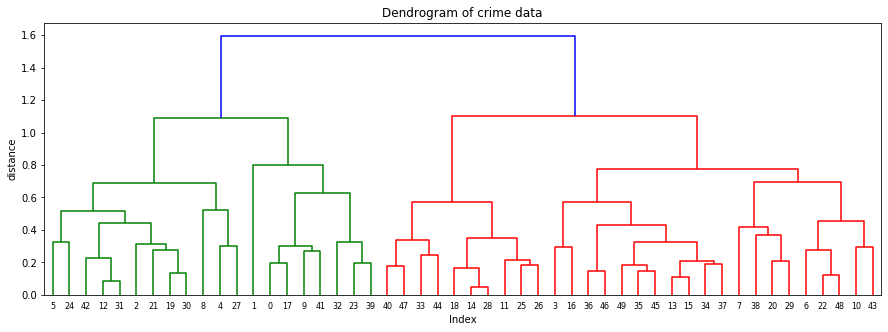

In [42]:
plt.figure(figsize=(15,5));
plt.title('Dendrogram of crime data')
plt.xlabel('Index')
plt.ylabel('distance')

sch.dendrogram(
    z,
    leaf_rotation=0,
    leaf_font_size=8,

)

plt.show

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
h_clust=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity='euclidean')

In [45]:
h_clust.fit(df_norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [47]:
clust_labels=pd.Series(h_clust.labels_)

In [48]:
df['clust']=clust_labels

In [50]:
df=df.iloc[:,[5,0,1,2,3,4,]]

In [51]:
df.head()

,clust,states,Murder,Assault,UrbanPop,Rape
0,3,Alabama,13.2,236,58,21.2
1,4,Alaska,10.0,263,48,44.5
2,1,Arizona,8.1,294,80,31.0
3,0,Arkansas,8.8,190,50,19.5
4,1,California,9.0,276,91,40.6


## Grouping Clusters by thier mean

In [53]:
df.iloc[:,2:].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,5.715000,132.300000,70.800000,18.100000
1,10.883333,256.916667,78.333333,32.250000
2,3.180000,78.700000,49.300000,11.630000
3,14.671429,251.285714,54.285714,21.685714
4,10.000000,263.000000,48.000000,44.500000


## Performing KMeans Clustering

In [56]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist


## Scree plot 

([<matplotlib.axis.XTick at 0x19f01b422b0>,
 <a list of 23 Text xticklabel objects>)

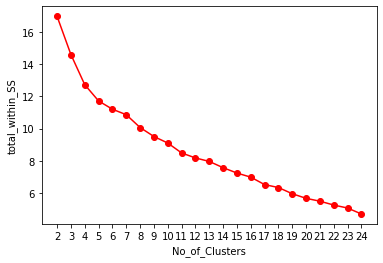

In [62]:
k=list(range(2,25))
twss=[]
for i in  k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wss=[]
    for j in range (i):
        wss.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    twss.append(sum(wss))   
    
plt.plot(k,twss, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)        
        

In [63]:
model=KMeans(n_clusters=7)

In [64]:
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
df['clust']=md # creating a  new column and assigning it to new column 
df.head()

,clust,states,Murder,Assault,UrbanPop,Rape
0,1,Alabama,13.2,236,58,21.2
1,3,Alaska,10.0,263,48,44.5
2,6,Arizona,8.1,294,80,31.0
3,4,Arkansas,8.8,190,50,19.5
4,3,California,9.0,276,91,40.6


## Grouping Clusters by thier mean

In [69]:
df.iloc[:,2:].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,2.680000,70.100000,51.000000,10.910000
1,14.671429,251.285714,54.285714,21.685714
2,6.687500,142.125000,68.375000,23.100000
3,10.240000,250.000000,74.400000,40.980000
4,7.120000,134.200000,55.400000,16.860000
5,4.900000,137.750000,80.625000,16.037500
6,11.485714,274.000000,78.000000,28.342857
